<a href="https://colab.research.google.com/github/JuanD-Silva/Python-and-Statistics-for-Financial-Analysis/blob/main/Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
die = pd.DataFrame([1,2,3,4,5,6])
sum_of_dice = die.sample(2, replace=True).sum().loc[0]
print('La suma de los dados es', sum_of_dice)

La suma de los dados es 4


In [ ]:
np.random.seed(1)
sum_of_three_dice = die.sample(3, replace=True).sum().loc[0]
print('La suma de los dados es', sum_of_three_dice)

La suma de los dados es 15


In [ ]:
trial = 200
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
print(result[:10])

[12, 5, 9, 2, 11, 8, 4, 10, 2, 11]


In [ ]:
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

0
2      9
3      6
4     14
5     24
6     29
7     27
8     29
9     23
10    22
11    11
12     6
Name: count, dtype: int64


<Axes: title={'center': 'Frecuencia de Suma de Dados'}, xlabel='0'>

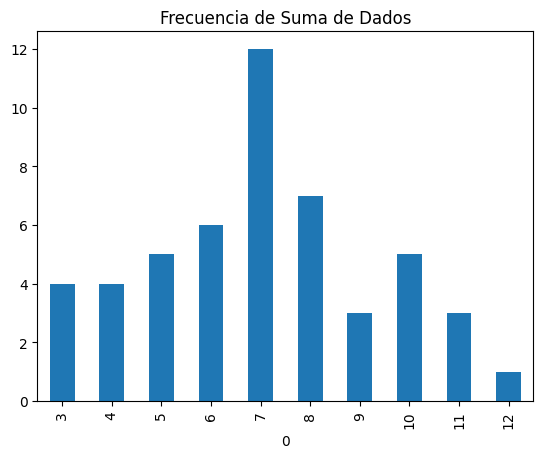

In [ ]:
sort_freq.plot(kind='bar', title='Frecuencia de Suma de Dados')

<Axes: title={'center': 'Frecuencia Relativa de Suma de Dados'}, xlabel='0'>

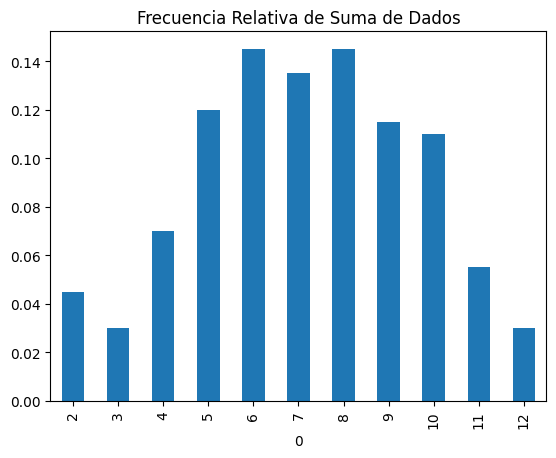

In [ ]:
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', title='Frecuencia Relativa de Suma de Dados')

<Axes: title={'center': 'Frecuencia Relativa de Suma de Dados'}, xlabel='0'>

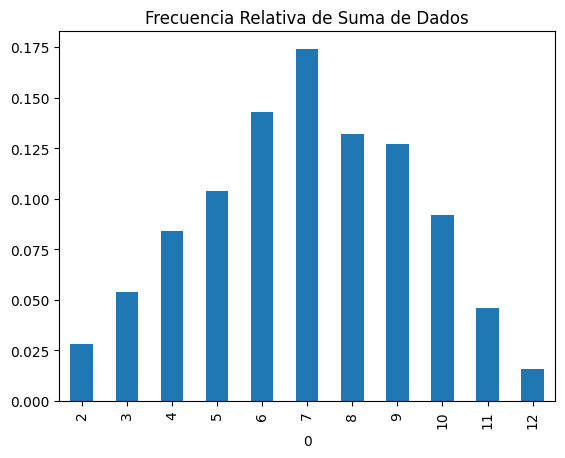

In [ ]:
trial = 1000
result = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', title='Frecuencia Relativa de Suma de Dados')

In [ ]:
x_distri = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11,12])
x_distri['Prob'] = [1,2,3,4,5,6,5,4,3,2,1]
x_distri['Prob'] = x_distri['Prob']/36
x_distri.index.name = 'Suma de Dados'
x_distri

,Prob
Suma de Dados,
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333


In [ ]:
mean = pd.Series(x_distri.index * x_distri['Prob']).sum()
var = pd.Series(((x_distri.index - mean)**2)*x_distri['Prob']).sum()

In [ ]:
trial = 2000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]


In [ ]:
results = pd.Series(results)
print(results.mean())
print(results.var())

7.1335
5.971663581790901


In [ ]:
ms = pd.read_csv('/content/microsoft.csv')
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [ ]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,LogReturn
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


`μ` (Mu) - La Media**
### 📌 ¿Qué es?
- Es el **valor promedio** de una serie de datos.  
- En nuestro caso, representa la **media de los retornos logarítmicos** de Microsoft.

### 📌 Fórmula:
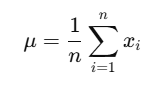


## **2️⃣ `σ` (Sigma) - La Desviación Estándar (Volatilidad)**
### 📌 ¿Qué es?
- Es una medida de **dispersión** o **volatilidad**, que indica qué tan lejos están los valores de la media.
- En nuestro caso, **representa la volatilidad diaria de los retornos logarítmicos**.

### 📌 Fórmula:
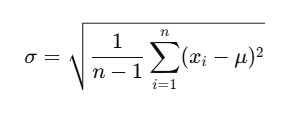


## **3️⃣ `PDF` (Función de Densidad de Probabilidad)**
### 📌 ¿Qué es?
- La **PDF (`Probability Density Function`)** describe la **forma de la distribución** de los datos.
- En el caso de una **distribución normal**, la PDF se calcula con:

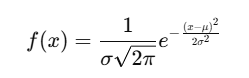

### 📌 ¿Qué significa en gráficos?
- Es la **curva en forma de campana** (Campana de Gauss).
- La **altura de la curva** indica **qué tan probable es un valor `x`**.
- **Valores cercanos a la media son más frecuentes**.

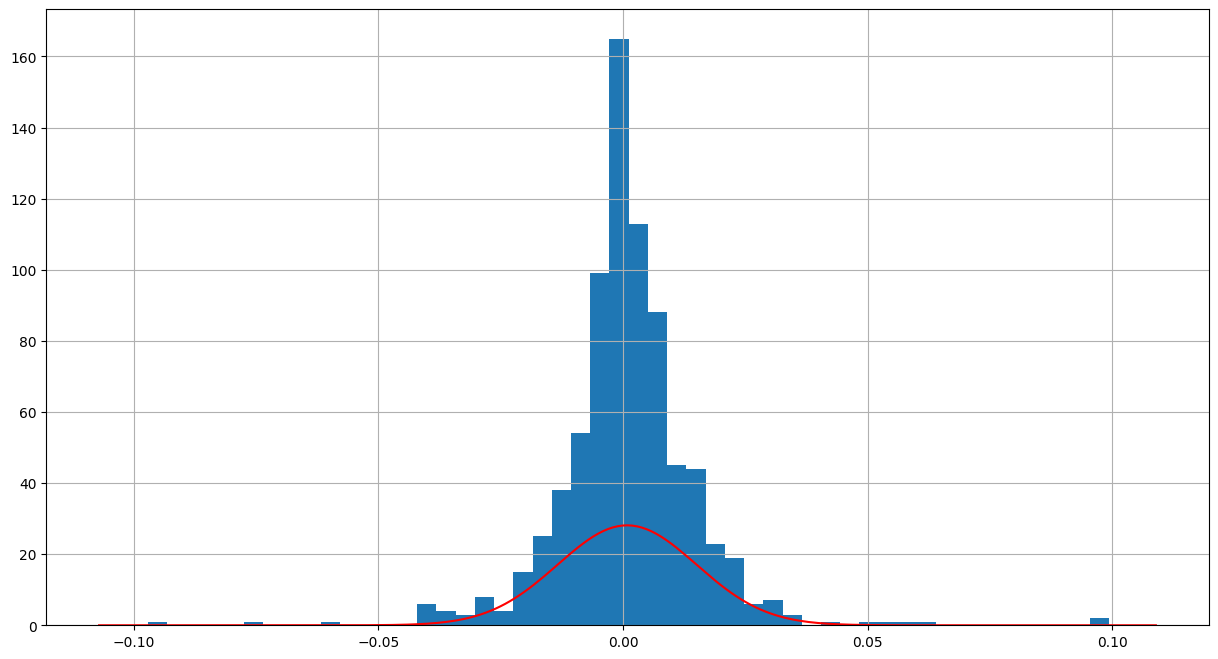

In [ ]:
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min() -0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50,figsize=(15,8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

# **CDF (Función de Distribución Acumulada)**

📌 ¿Qué es?

La **CDF** (Cumulative Distribution Function) nos dice **la probabilidad de que una variable sea menor o igual a un valor** x.
Se calcula como la integral de la **PDF**:

𝐹
(
𝑥
)
=
𝑃
(
𝑋
≤
𝑥
)


In [ ]:
prob_return1 = norm.cdf(-0.10, mu, sigma)
print("La probabilidad de que microsoft baje un 10% en un día es de:",prob_return1)

La probabilidad de que microsoft baje un 10% en un día es de: 6.056775634858521e-13


In [ ]:
mu220 = 220*mu
sigma220 = (220** 0.5)*sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('La probabilidad de que microsoft baje un 20% en 220 dias es de: ',drop20)


La probabilidad de que microsoft baje un 40% en 220 dias es de:  0.03535237727490905


# **🔹 ¿Qué es el Valor en Riesgo (VaR)?**
El **Valor en Riesgo (VaR)** es una métrica financiera que **estima la pérdida máxima esperada** en un activo o portafolio en un período determinado con un cierto nivel de confianza.

📌 **Interpretación del resultado:**

- VaR(5%) → Representa la pérdida máxima esperada en **un día **con un **95% de confianza.**
**Si** VaR = -0.03, significa que *hay un 5% de probabilidad* de que Microsoft pierda más del 3% en un solo día.

In [ ]:
VaR = norm.ppf(0.05, mu, sigma)
print('El VaR de Microsoft en un día es de: ',VaR)

El VaR de Microsoft en un día es de:  -0.022523362407065


In [ ]:
#Quatile
#5% quantile
print('5% quantile ',norm.ppf(0.05, mu, sigma))
#10% quantile
print('95% quantile ',norm.ppf(0.95, mu, sigma))

5% quantile  -0.022523362407065
95% quantile  0.024163825379311034


In [ ]:
#25% quantile and 75% quantile
print('25% quantile ',norm.ppf(0.25, mu, sigma))
print('75% quantile ',norm.ppf(0.75, mu, sigma))

25% quantile  -0.008752057838414963
75% quantile  0.010392520810661006


In [ ]:
pdf = pd.DataFrame([2, 3, 4, 5, 6])
pdf.mean()

,0
0,4.0
